In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
122,5950000,6254,4,2,1,yes,no,yes,no,no,1,yes,semi-furnished
298,4200000,5800,3,1,1,yes,no,no,yes,no,2,no,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
471,3010000,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
325,4007500,3460,4,1,2,yes,no,no,no,yes,0,no,semi-furnished


In [4]:
df_new = df[['price','area','bedrooms']]

In [5]:
df_new.sample(5)

,price,area,bedrooms
276,4305000,4400,2
9,9800000,5750,3
455,3129000,5495,3
509,2590000,3600,2
283,4270000,4360,4


In [6]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaler_x = sx.fit_transform(df_new.drop('price',axis = 'columns'))
scaler_x

array([[0.39656357, 0.6       ],
       [0.5024055 , 0.6       ],
       [0.57113402, 0.4       ],
       ...,
       [0.13539519, 0.2       ],
       [0.08659794, 0.4       ],
       [0.15120275, 0.4       ]])

In [7]:
scaler_y = sy.fit_transform(df_new['price'].values.reshape(df_new.shape[0],1))
scaler_y

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

In [8]:
import numpy as np

def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_features = X.shape[1]
    w = np.ones(shape=(number_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epochs_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i % 10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w, b, cost_list, epochs_list

# Example usage:
# Ensure `scaler_x` and `scaler_y` are defined before calling the function.
w, b, cost_list, epoch_list = batch_gradient_descent(scaler_x, scaler_y.reshape(scaler_y.shape[0],), 500)

# Output results
w, b, cost_list, epoch_list

        

(array([0.84340124, 0.77702145]),
 -0.2524249137612991,
 [0.17217243159141116,
  0.11600000379474755,
  0.08164490372909784,
  0.060619509859087074,
  0.047738264765655694,
  0.03983302367357499,
  0.03496819019503379,
  0.031961199577993774,
  0.03008955554309399,
  0.028911842970552985,
  0.028158374703915336,
  0.02766438166651648,
  0.027329195028096148,
  0.027091308344732907,
  0.026913141648076375,
  0.026771732989134062,
  0.026653051390130036,
  0.02654852231377826,
  0.026452904881161615,
  0.026362994947198504,
  0.026276832737943047,
  0.026193218752468286,
  0.026111418000542484,
  0.02603097930500355,
  0.02595162490348897,
  0.025873182999910437,
  0.025795546556291564,
  0.02571864811628827,
  0.025642444423347163,
  0.025566907022948452,
  0.025492016520856368,
  0.025417759075027007,
  0.025344124252181497,
  0.025271103718129448,
  0.02519869043747761,
  0.025126878184550904,
  0.025055661244451636,
  0.02498503423028548,
  0.024914991971361437,
  0.02484552944475471

In [9]:
cost_list

[0.17217243159141116,
 0.11600000379474755,
 0.08164490372909784,
 0.060619509859087074,
 0.047738264765655694,
 0.03983302367357499,
 0.03496819019503379,
 0.031961199577993774,
 0.03008955554309399,
 0.028911842970552985,
 0.028158374703915336,
 0.02766438166651648,
 0.027329195028096148,
 0.027091308344732907,
 0.026913141648076375,
 0.026771732989134062,
 0.026653051390130036,
 0.02654852231377826,
 0.026452904881161615,
 0.026362994947198504,
 0.026276832737943047,
 0.026193218752468286,
 0.026111418000542484,
 0.02603097930500355,
 0.02595162490348897,
 0.025873182999910437,
 0.025795546556291564,
 0.02571864811628827,
 0.025642444423347163,
 0.025566907022948452,
 0.025492016520856368,
 0.025417759075027007,
 0.025344124252181497,
 0.025271103718129448,
 0.02519869043747761,
 0.025126878184550904,
 0.025055661244451636,
 0.02498503423028548,
 0.024914991971361437,
 0.024845529444754714,
 0.024776641733363577,
 0.02470832400015383,
 0.02464057147229446,
 0.02457337943133726,
 0.0

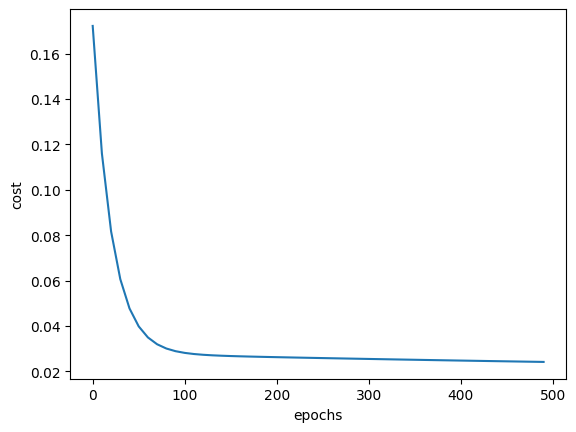

In [10]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [11]:
def predict(area,bedrooms,w,b):
    scaler_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]* scaler_x[0] + w[1]* scaler_x [1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
predict(3000,3,w,b)

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3328161.842864612

In [12]:
sx.transform([[3000,3]])

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.09278351, 0.4       ]])

In [13]:
predict(7200,3,w,b)

C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


6140078.983094387

In [14]:
import random
random.randint(0,6)

0

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2 / total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2 / total_samples) * (sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_predicted))

        if i % 100 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w, b, cost_list, epochs_list

# Example usage:
# Ensure `scaler_x` and `scaler_y` are defined before calling the function.
w_sgd, b_sgd,cost_sgd, epochs_list_sgd  = stochastic_gradient_descent(scaler_x, scaler_y.reshape(scaler_y.shape[0],), 10000)

# Output results
w_sgd, b_sgd, cost_sgd
        

        
    
    
    
    
    

(array([0.96933447, 0.951241  ]),
 -0.10972962924919291,
 [0.01766133884473194,
  0.09232105370804634,
  0.07687391942259335,
  0.014407839277847898,
  0.20540676433176333,
  0.03378995928617632,
  0.1559979532102579,
  0.03373769729347748,
  0.45933719132043804,
  0.1276409777657552,
  0.08345062819430869,
  0.4706657897330601,
  0.03660809977250267,
  0.03491937139959086,
  0.317336063549176,
  0.13018533162731125,
  0.03585163063991616,
  0.20074913568348787,
  0.14490314631750276,
  0.020083643228327227,
  0.42159713875594246,
  0.1073423871659845,
  0.41263544010153214,
  0.048490169816085955,
  0.008384625096452266,
  0.2712835883732369,
  0.23614139392056532,
  0.09004628711729606,
  0.2606642470941281,
  0.06651696026956866,
  0.2597059723577186,
  0.34110156550393295,
  0.05837303557384911,
  0.39396063873127246,
  0.05978126985197395,
  0.4761498675287869,
  0.020223391993347908,
  0.690595726232946,
  0.02327622831662392,
  0.05924872688651318,
  0.005147322820032444,
  0.12

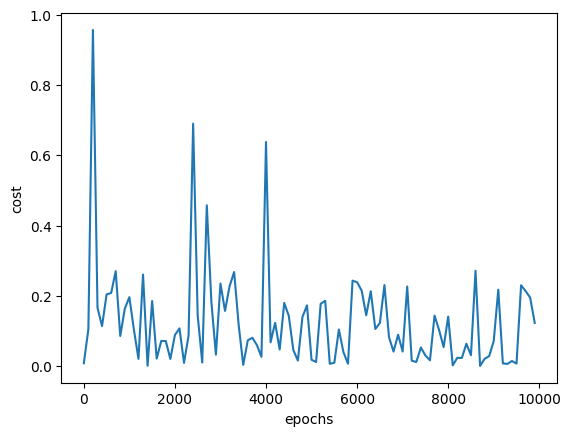

In [18]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epochs_list_sgd, cost_list_sgd)
           

In [33]:
import numpy as np
import random


def mini_batch_size(X, y_true, epochs, learning_rate=0.01, batch_size=32):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epochs_list = []

    for i in range(epochs):
        random_index = np.random.choice(total_samples, batch_size, replace=False)
        shuffle_x = X[random_index]
        shuffle_y = y_true[random_index]
        y_predicted = np.dot(shuffle_x, w) + b

        w_grad = -(2 / batch_size) * (shuffle_x.T.dot(shuffle_y - y_predicted))
        b_grad = -(2 / batch_size) * np.sum(shuffle_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        if i % 100 == 0:
            cost = np.mean(np.square(y_true - (np.dot(X, w) + b)))
            cost_list.append(cost)
            epochs_list.append(i)

    return w, b, cost_list, epochs_list

# Example usage (assuming scaler_x and scaler_y are defined and preprocessed)
w_mini, b_mini, cost_mini, epochs_list_mini = mini_batch_size(scaler_x, scaler_y.reshape(scaler_y.shape[0],), epochs=1000)

w_mini, b_mini, cost_mini



(array([0.78121745, 0.69868104]),
 -0.2053221082974584,
 [0.16527119594316247,
  0.028505531929795377,
  0.026337226427135468,
  0.02554388238398964,
  0.024813121547226705,
  0.024155280652926985,
  0.02352951742901019,
  0.022974742131884364,
  0.022501189664029735,
  0.02202922604466371])